In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 78% 73.0M/93.0M [00:01<00:00, 44.9MB/s]
100% 93.0M/93.0M [00:01<00:00, 66.3MB/s]


In [4]:
!unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
  inflating: immo_data.csv           


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import time

In [7]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('immo_data.csv')
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [8]:
data.shape

(268850, 49)

In [9]:
data.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

## 1. Data Cleaning

In [12]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [13]:
def delete_features_with_lots_of_null(data):
  result = data.drop(columns=data.columns[((data.isna().sum()/len(data)) > 0.5)], axis=1)
  return result

In [14]:
useless_features = ['facilities', 'geo_bln', 'description', 'geo_krs', 'livingSpaceRange','scoutId','street','streetPlain','houseNumber','date']

def delete_useless_features(data, columns):
  result = data.drop(columns=columns, axis=1)
  return result

In [15]:
def delete_dumb_values(data):
  data = data.drop(data[data['livingSpace'] == 0.0].index)
  data = data.drop(data[data['totalRent'] == 0.0].index)
  return data

In [16]:
def fill_numeric(data):
  data.fillna(data._get_numeric_data().mean(),inplace = True)
  return data

def fill_categorical(data):
  for cols in data.columns:
    if data[cols].dtype == 'object' or data[cols].dtype == 'bool':
        data[cols].fillna(data[cols].value_counts().head(1).index[0],inplace = True)
  return data

def fill_missing_values(data):
  fill_numeric(data)
  fill_categorical(data)
  return data

In [17]:
def remove_cat_features_with_lots_of_values(data):
  for cols in data.columns:
      if data[cols].dtype == 'object' or data[cols].dtype == 'bool':
        if data[cols].nunique() > 100:
          data.drop([cols], axis=1, inplace=True)
  return data

In [18]:
def drop_outlier(data):
  for cols in data.columns:
    if data[cols].dtype == 'int64' or data[cols].dtype == 'float64':
        upper_range = data[cols].mean() + 3 * data[cols].std()
        lower_range = data[cols].mean() - 3 * data[cols].std()
        
        indexs = data[(data[cols] > upper_range) | (data[cols] < lower_range)].index
        data = data.drop(indexs)
  return data

In [20]:
def clean_data(data):
  data = delete_features_with_lots_of_null(data)
  useless_features = ['facilities', 'geo_bln', 'description', 'geo_krs', 'livingSpaceRange','scoutId','street','streetPlain','houseNumber','date']
  data = delete_useless_features(data, useless_features)
  data = delete_dumb_values(data)
  #data = fill_missing_values(data)
  data = remove_cat_features_with_lots_of_values(data)
  data = drop_outlier(data)

  return data 

In [18]:
def normal(seri):
  return (seri - seri.mean())/seri.std()

def normalize_data(data):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  numerics = data.select_dtypes(include=numerics).columns.tolist()
  res = map(normal, list(data[col] for col in numerics))
  data[numerics] = pd.concat(list(res), axis=1)
  
  return data

In [21]:
start_time = time.time()
data = clean_data(data)
print("--- preprocessing data with simple pandas took %s seconds ---" % (time.time() - start_time))

--- preprocessing data with simple pandas took 2.9880728721618652 seconds ---


In [ ]:
start_time = time.time()
normalize_data(data)
print("--- preprocessing data with simple pandas took %s seconds ---" % (time.time() - start_time))

--- preprocessing data with simple pandas took 0.38794708251953125 seconds ---


In [12]:
data = clean_data(data)
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,False,True,2.0,595.0,86.00,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,False,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,False,True,9.0,965.0,83.80,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,False,False,2.0,343.0,58.15,NaN,NaN,NaN,False,2,other,9599,3.0,86.0,3.0,NaN,3,False
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,False,False,1.0,765.0,84.97,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False


## 2. Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,False,True,2.0,595.0,86.00,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.40000,1.000000,3.000000,4,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,902.268665,1871.0,False,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.72574,2.122786,3.574554,3,False
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,False,True,9.0,965.0,83.80,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,114.72574,3.000000,4.000000,3,False
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,902.268665,1964.0,False,False,2.0,343.0,58.15,well_kept,normal,negotiable,False,2,other,9599,3.0,86.00000,3.000000,3.574554,3,False
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19,2.46,28.808085,903.000000,1950.0,False,False,1.0,765.0,84.97,refurbished,normal,negotiable,False,5,apartment,28213,3.0,188.90000,1.000000,3.574554,3,False


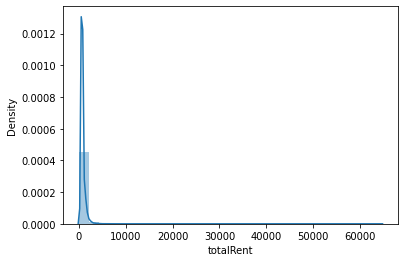

In [26]:
sns.distplot(data['totalRent'], bins=30)

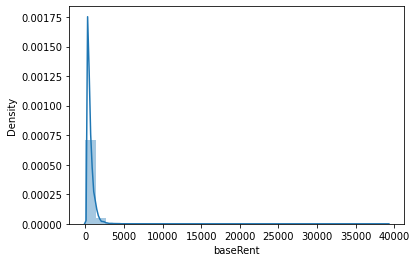

In [27]:
sns.distplot(data['baseRent'], bins=30)

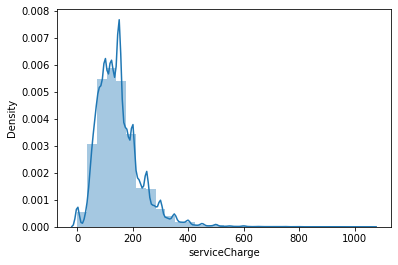

In [28]:
sns.distplot(data['serviceCharge'], bins=30)

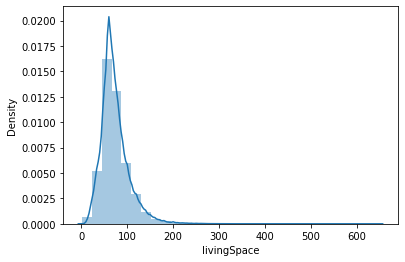

In [29]:
sns.distplot(data['livingSpace'], bins=30)

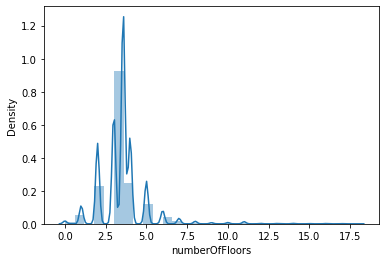

In [31]:
sns.distplot(data['numberOfFloors'], bins=30)

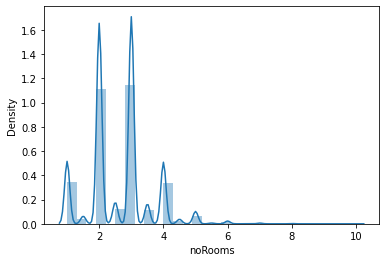

In [36]:
sns.distplot(data['noRooms'], bins=30)

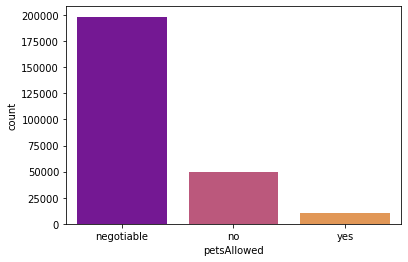

In [43]:
sns.countplot(data['petsAllowed'], palette="plasma")

Text(0.5, 1.0, 'Density and distribution of total rent for each region')

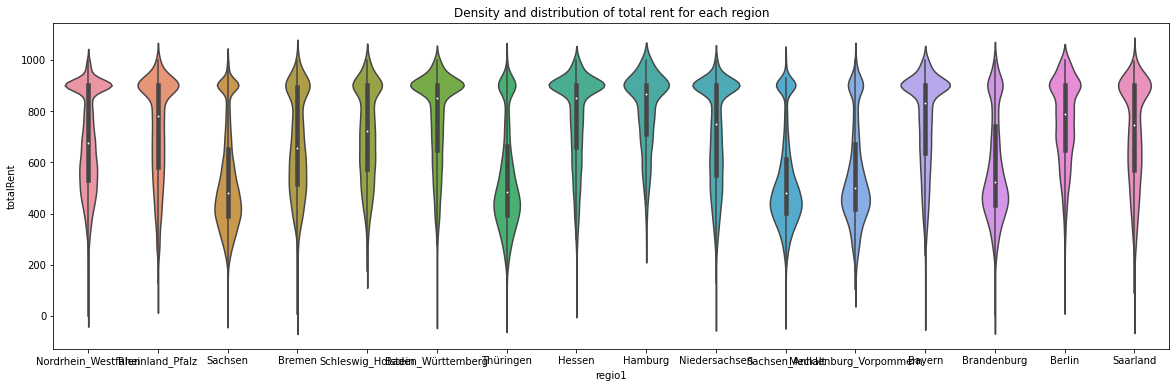

In [41]:
#using violinplot to showcase density and distribtuion of prices 
plt.figure(figsize=(20,6))
viz_2=sns.violinplot(data=data[data['totalRent'] < 1000], x='regio1', y='totalRent')
viz_2.set_title('Density and distribution of total rent for each region')

Text(0.5, 1.0, 'Region')

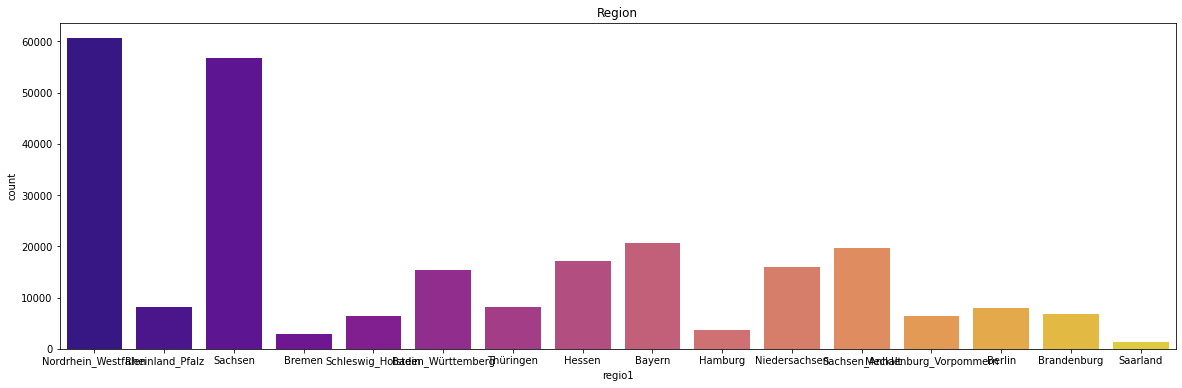

In [35]:
plt.figure(figsize=(20,6))
sns.countplot(data['regio1'], palette="plasma")
plt.title('Region')

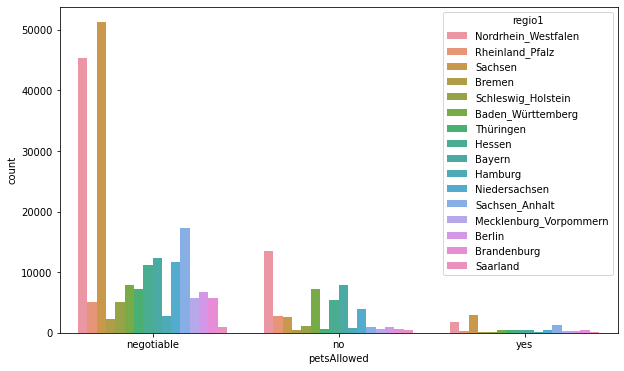

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data['petsAllowed'], hue=data['regio1'])

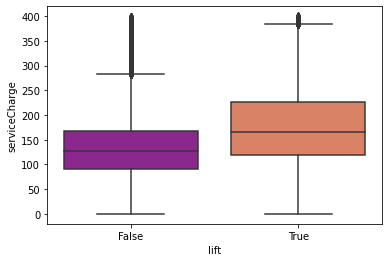

In [46]:
sns.boxplot(data=data[data['serviceCharge'] < 400], x='lift',y='serviceCharge',palette='plasma')

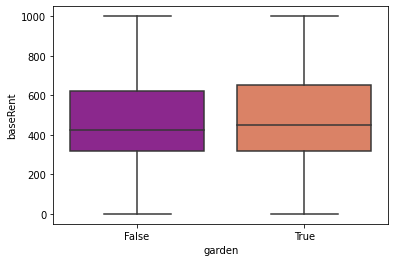

In [49]:
sns.boxplot(data=data[data['baseRent'] < 1000], x='garden',y='baseRent',palette='plasma')

## 3. Prediction

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

### Feature Engineering

1. in our first method we just drop nan values and and use ordinal encoding to encode categorical values 

In [169]:
temp = data.dropna()

In [170]:
temp.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
8,Baden_Württemberg,110.0,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.0,690.0,1970.0,True,True,2.0,580.0,53.00,well_kept,sophisticated,no,False,4,roof_storey,79211,2.0,138.0,2.0,2.0,2,False
20,Schleswig_Holstein,140.0,central_heating,ONE_YEAR_FREE,False,True,15,5.00,10.0,1450.0,1978.0,False,True,3.0,1150.0,160.00,well_kept,sophisticated,negotiable,False,7,ground_floor,24539,4.0,187.0,0.0,2.0,4,True
24,Hamburg,140.0,central_heating,ONE_YEAR_FREE,False,True,9,6.30,40.0,760.0,1953.0,False,True,2.0,620.0,55.89,fully_renovated,normal,negotiable,False,5,apartment,22111,3.0,142.0,2.0,4.0,3,False


In [171]:
enc = OrdinalEncoder()
for col in temp.select_dtypes(exclude='number'):
  temp[col] = np.concatenate(enc.fit_transform(temp[col].to_numpy().reshape(-1, 1)))
temp.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
8,0.0,110.0,8.0,1.0,0.0,0.0,5,3.77,40.0,690.0,1970.0,1.0,1.0,2.0,580.0,53.00,9.0,3.0,1.0,0.0,4,8.0,79211,2.0,138.0,2.0,2.0,2,0.0
20,14.0,140.0,0.0,1.0,0.0,1.0,15,5.00,10.0,1450.0,1978.0,0.0,1.0,3.0,1150.0,160.00,9.0,3.0,0.0,0.0,7,1.0,24539,4.0,187.0,0.0,2.0,4,1.0
24,5.0,140.0,0.0,1.0,0.0,1.0,9,6.30,40.0,760.0,1953.0,0.0,1.0,2.0,620.0,55.89,2.0,1.0,0.0,0.0,5,0.0,22111,3.0,142.0,2.0,4.0,3,0.0


In [172]:
x = temp.drop(['totalRent'], axis=1)
y = temp['totalRent']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

MAE: 31.038182
RMSE: 49.536376
R2 0.991454


2. fill null values with modes and using oridinal encoding to encode categorical features

In [173]:
temp = data.copy()
for i in temp.columns:
  temp[i].fillna(temp[i].mode().loc[0], inplace=True)
temp.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,False,True,2.0,595.0,86.0,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,500.0,1871.0,False,False,1.0,800.0,89.0,refurbished,normal,no,False,5,ground_floor,67459,3.0,105.0,1.0,3.0,3,False
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,False,True,9.0,965.0,83.8,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,105.0,3.0,4.0,3,False


In [174]:
enc = OrdinalEncoder()
for col in temp.select_dtypes(exclude='number'):
  temp[col] = np.concatenate(enc.fit_transform(temp[col].to_numpy().reshape(-1, 1)))
temp.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,9.0,245.0,0.0,1.0,0.0,0.0,6,4.62,10.0,840.0,1965.0,0.0,1.0,2.0,595.0,86.0,9.0,1.0,0.0,0.0,4,1.0,44269,4.0,181.4,1.0,3.0,4,1.0
1,10.0,134.0,9.0,1.0,0.0,1.0,8,3.47,10.0,500.0,1871.0,0.0,0.0,1.0,800.0,89.0,7.0,1.0,1.0,0.0,5,1.0,67459,3.0,105.0,1.0,3.0,3,0.0
2,12.0,255.0,4.0,1.0,1.0,1.0,8,2.72,2.4,1300.0,2019.0,0.0,1.0,9.0,965.0,83.8,0.0,3.0,0.0,1.0,6,0.0,1097,3.0,105.0,3.0,4.0,3,0.0


In [175]:
x = temp.drop(['totalRent'], axis=1)
y = temp['totalRent']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

MAE: 108.875371
RMSE: 297.065130
R2 0.677137


3. using mode to replace null values and use one hot encoding 

In [176]:
temp = data.copy()
for i in temp.columns:
  temp[i].fillna(temp[i].mode().loc[0], inplace=True)
temp.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,False,True,2.0,595.0,86.0,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,500.0,1871.0,False,False,1.0,800.0,89.0,refurbished,normal,no,False,5,ground_floor,67459,3.0,105.0,1.0,3.0,3,False
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,False,True,9.0,965.0,83.8,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,105.0,3.0,4.0,3,False


In [178]:
temp = pd.get_dummies(temp)

In [179]:
x = temp.drop(['totalRent'], axis=1)
y = temp['totalRent']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

MAE: 107.756224
RMSE: 253.516353
R2 0.743771


4. using mode to replace null values and use one hot encoding then apply pca 

In [180]:
temp = data.copy()
for i in temp.columns:
  temp[i].fillna(temp[i].mode().loc[0], inplace=True)
temp.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,False,True,2.0,595.0,86.0,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,500.0,1871.0,False,False,1.0,800.0,89.0,refurbished,normal,no,False,5,ground_floor,67459,3.0,105.0,1.0,3.0,3,False
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,False,True,9.0,965.0,83.8,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,105.0,3.0,4.0,3,False


In [187]:
pca = PCA(n_components=40)
temp = pd.get_dummies(temp)

In [188]:
x = temp.drop(['totalRent'], axis=1)
y = temp['totalRent']
print(x.shape)
x = pca.fit_transform(x)
print(x.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

(260181, 80)
(260181, 40)
MAE: 108.157500
RMSE: 237.652366
R2 0.769912


5. replace null values with mode and use one-hot encoding more over using k-best feature selection 

In [189]:
temp = data.copy()
for i in temp.columns:
  temp[i].fillna(temp[i].mode().loc[0], inplace=True)

temp = pd.get_dummies(temp)
temp.head(3)

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,245.0,False,False,6,4.62,10.0,840.0,1965.0,False,True,2.0,595.0,86.0,False,4,44269,4.0,181.4,1.0,3.0,4,True,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,134.0,False,True,8,3.47,10.0,500.0,1871.0,False,False,1.0,800.0,89.0,False,5,67459,3.0,105.0,1.0,3.0,3,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,255.0,True,True,8,2.72,2.4,1300.0,2019.0,False,True,9.0,965.0,83.8,True,6,1097,3.0,105.0,3.0,4.0,3,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0


In [191]:
from sklearn.feature_selection import f_regression, SelectKBest

x = temp.drop(['totalRent'], axis=1)
y = temp['totalRent']
x_new = SelectKBest(f_regression, k=40).fit_transform(x, y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

MAE: 109.019365
RMSE: 237.227280
R2 0.775958


6.apply our optimized pipeline to data and use several algorithms for regression

In [196]:
x = temp.drop(['totalRent'], axis=1)
y = temp['totalRent']
print(x.shape)
x = pca.fit_transform(x)
print(x.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

(260181, 80)
(260181, 40)


In [198]:
###Linear Regression
lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

###Ridge
ridge_x = Ridge()
ridge_x.fit(x_train, y_train)           
pred_ridge = ridge_x.predict(x_test) 

###Lasso
Lasso_x = Lasso()
Lasso_x.fit(x_train, y_train)
pred_Lasso = Lasso_x.predict(x_test) 

##Gradient Boosting
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train) 
pred_gb= model_gb.predict(x_test)


In [199]:
print('-------------Lineer Regression-----------')

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('---------------GradientBoosting-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_gb)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_gb)))
print('R2 %f' % r2_score(y_test, pred_gb))


-------------Lineer Regression-----------
MAE: 107.780878
RMSE: 239.958513
R2 0.765841
---------------Ridge ---------------------
MAE: 107.780684
RMSE: 239.958509
R2 0.765841
---------------Lasso-----------------------
MAE: 106.868891
RMSE: 240.228653
R2 0.765313
---------------GradientBoosting-------------------
MAE: 107.325270
RMSE: 241.043454
R2 0.763718


7. using sklearn iterative imputer to fill continous null values

In [60]:
imp = IterativeImputer(max_iter=10)
temp = imp.fit_transform(pd.get_dummies(data.select_dtypes(include='number')))
temp = pd.DataFrame(temp)
temp.columns = data.select_dtypes(include='number').columns.tolist()
temp.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange
0,245.00,6.0,4.62,10.000000,840.000000,1965.0,2.0,595.0,86.00,4.0,44269.0,4.0,181.400000,1.000000,3.000000,4.0
1,134.00,8.0,3.47,10.000000,950.309622,1871.0,1.0,800.0,89.00,5.0,67459.0,3.0,130.284766,1.143691,2.213905,3.0
2,255.00,8.0,2.72,2.400000,1300.000000,2019.0,9.0,965.0,83.80,6.0,1097.0,3.0,43.303310,3.000000,4.000000,3.0
3,58.15,9.0,1.53,40.000000,435.286889,1964.0,2.0,343.0,58.15,2.0,9599.0,3.0,86.000000,3.000000,4.530184,3.0
4,138.00,19.0,2.46,28.875867,903.000000,1950.0,1.0,765.0,84.97,5.0,28213.0,3.0,188.900000,1.000000,2.460598,3.0


In [72]:
for i in data.columns.tolist():
  if i not in c:
    print(i)

In [61]:
temp2 = data.select_dtypes(exclude='number')
temp2 = fill_categorical(temp2)
temp2.isna().sum()
temp = pd.concat([temp.reset_index(), temp2.reset_index()], axis=1, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [82]:
temp = temp.drop([0, 17], axis=1)
temp.columns = data.select_dtypes(include='number').columns.tolist() + data.select_dtypes(exclude='number').columns.tolist()  

In [84]:
temp.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,regio1,heatingType,telekomTvOffer,newlyConst,balcony,hasKitchen,cellar,condition,interiorQual,petsAllowed,lift,typeOfFlat,garden
0,245.00,6.0,4.62,10.000000,840.000000,1965.0,2.0,595.0,86.00,4.0,44269.0,4.0,181.400000,1.000000,3.000000,4.0,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,False,False,True,well_kept,normal,negotiable,False,ground_floor,True
1,134.00,8.0,3.47,10.000000,950.309622,1871.0,1.0,800.0,89.00,5.0,67459.0,3.0,130.284766,1.143691,2.213905,3.0,Rheinland_Pfalz,self_contained_central_heating,ONE_YEAR_FREE,False,True,False,False,refurbished,normal,no,False,ground_floor,False
2,255.00,8.0,2.72,2.400000,1300.000000,2019.0,9.0,965.0,83.80,6.0,1097.0,3.0,43.303310,3.000000,4.000000,3.0,Sachsen,floor_heating,ONE_YEAR_FREE,True,True,False,True,first_time_use,sophisticated,negotiable,True,apartment,False
3,58.15,9.0,1.53,40.000000,435.286889,1964.0,2.0,343.0,58.15,2.0,9599.0,3.0,86.000000,3.000000,4.530184,3.0,Sachsen,district_heating,ONE_YEAR_FREE,False,True,False,False,well_kept,normal,negotiable,False,other,False
4,138.00,19.0,2.46,28.875867,903.000000,1950.0,1.0,765.0,84.97,5.0,28213.0,3.0,188.900000,1.000000,2.460598,3.0,Bremen,self_contained_central_heating,ONE_YEAR_FREE,False,True,False,False,refurbished,normal,negotiable,False,apartment,False


In [93]:
x = temp.drop(['totalRent'], axis=1)
y = temp['totalRent']
x = pd.get_dummies(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

MAE: 30.502854
RMSE: 58.327246
R2 0.988366


## 4. Multiprocessing

In [ ]:
from multiprocessing import Pool, cpu_count

def multiprocessing_normalize_data(data):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  numerics = data.select_dtypes(include=numerics).columns.tolist()
  cpu_count()
  pool = Pool(2) 
  res = pool.imap(normal, list(data[col] for col in numerics))
  data[numerics] = pd.concat(list(res), axis=1)
  
  return data

In [ ]:
start_time = time.time()
multiprocessing_normalize_data(data)
print("--- preprocessing data with simple pandas took %s seconds ---" % (time.time() - start_time))

--- preprocessing data with simple pandas took 0.8081302642822266 seconds ---


## 5. Dask & pyspark

### Dask : like multiprocessing I've implemented my normalization function with dask.

In [ ]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 837 kB 5.1 MB/s 
     |████████████████████████████████| 136 kB 42.1 MB/s 
     |████████████████████████████████| 830 kB 44.8 MB/s 
     |████████████████████████████████| 822 kB 44.0 MB/s 
     |████████████████████████████████| 802 kB 41.4 MB/s 
     |████████████████████████████████| 802 kB 38.4 MB/s 
     |████████████████████████████████| 793 kB 49.1 MB/s 
     |████████████████████████████████| 793 kB 44.6 MB/s 
     |████████████████████████████████| 791 kB 39.7 MB/s 
     |████████████████████████████████| 786 kB 39.5 MB/s 
     |████████████████████████████████| 779 kB 33.9 MB/s 
     |████████████████████████████████| 778 kB 54.1 MB/s 
     |████████████████████████████████| 776 kB 44.4 MB/s 
     |████████████████████████████████| 769 kB 45.1 MB/s 
     |████████████████████████████████| 766 kB 50.6 MB/s 
     |████████████████████████████████| 1.0 MB 40.5 MB/s 
     |████████████████████████████████| 722 kB 51.4 MB/s 
     |█████████

In [20]:
import dask
import dask.dataframe as dd
import numpy as np

In [ ]:
ddf = dd.from_pandas(data, npartitions=2)
start_time = time.time()
res = ddf.select_dtypes(include='number').apply(normal, axis=1)
print("--- preprocessing data with simple pandas took %s seconds ---" % (time.time() - start_time))

--- preprocessing data with simple pandas took 0.034152984619140625 seconds ---


/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:4150: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta={'serviceCharge': 'float64', 'picturecount': 'float64', 'pricetrend': 'float64', 'telekomUploadSpeed': 'float64', 'totalRent': 'float64', 'yearConstructed': 'float64', 'yearConstructedRange': 'float64', 'baseRent': 'float64', 'livingSpace': 'float64', 'baseRentRange': 'float64', 'geo_plz': 'float64', 'noRooms': 'float64', 'thermalChar': 'float64', 'floor': 'float64', 'numberOfFloors': 'float64', 'noRoomsRange': 'float64'})

  warnings.warn(meta_warning(meta))


In [ ]:
res.compute().head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange
0,1.040073,-0.927022,0.510015,-1.602638,-0.204635,-0.349646,-1.036179,-0.344454,0.203748,-0.113894,0.019464,1.302896,1.843991,-1.114055,-0.658292,1.430628
1,-0.066049,-0.147913,0.211936,-1.186579,0.300175,-2.933339,-1.074726,0.482981,0.674576,0.747821,1.280066,0.544967,0.194807,0.166412,0.180411,0.624453
2,0.924678,-0.662672,-0.728940,-2.159774,0.529659,1.134769,1.806737,0.279892,-0.047906,0.653546,-1.722152,-0.002151,-0.335958,0.290387,-0.033737,0.073623
3,-1.380585,0.283144,-1.139060,1.597770,0.672451,0.221550,-0.740743,-0.548946,-0.353962,-0.849533,-1.192373,1.042339,-0.772008,1.506029,0.491483,1.162445
4,-0.366100,1.841334,-0.763032,-0.204932,-0.011051,-0.846122,-1.560641,0.107639,0.253838,0.491268,-0.600258,0.262885,2.341372,-1.151024,-0.147550,0.352374


### pyspark : like other methods I've implemented my normalization with pyspark

In [8]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 21 kB/s 
     |████████████████████████████████| 198 kB 38.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=3b5702aaa57eeb904ff96be0866dd9a3cdc2dfd4b261804c61bf2289d2825d4a
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [9]:
import os, sys
sys.executable
os.environ["PYSPARK_PYTHON"] = sys.executable

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .getOrCreate()

In [48]:
sdf=(spark.read.format("csv").options(header="true")
    .load('immo_data.csv'))

sdf = sdf.na.replace('NA', None)

In [49]:
sdf.show(3)

+--------------------+-------------+--------------------+--------------+------------------------+----------+-------+------------+----------+------------------+---------+---------------+---------+------------+-----------+----------+-------------------+------+--------------------+--------+-----------+-----------+-----------------+-----------+------------+-----------+--------------------+---------------+-----+-------------+------------+-------+-------+-----------+-----+--------------+------------+------+----------------+-----------------+--------------+--------------------+--------------------+------------+---------------------+-------------+--------------------+-------------------+----+
|              regio1|serviceCharge|         heatingType|telekomTvOffer|telekomHybridUploadSpeed|newlyConst|balcony|picturecount|pricetrend|telekomUploadSpeed|totalRent|yearConstructed|  scoutId|noParkSpaces|firingTypes|hasKitchen|            geo_bln|cellar|yearConstructedRange|baseRent|houseNumber|living

In [50]:
start_time = time.time()

## drop useless columns
sdf = sdf.drop('facilities', 'geo_bln', 'description', 'geo_krs', 'livingSpaceRange','scoutId','street','streetPlain','houseNumber','date')

## drop nan
aptsps = sdf.dropna(how="any")

print(time.time()-start_time)

0.16138982772827148


In [ ]:
## I was not able to run this part 
from pyspark.sql.functions import PandasUDFType
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StructType, FloatType

sdf = spark.createDataFrame(data)
schema = StructType([StructField('seri', FloatType(), True)])
@pandas_udf(schema, functionType=PandasUDFType.GROUPED_MAP)
def normal_spark(seri):
  return (seri - seri.mean())/seri.std()

sdf.apply(normal_spark)